In [1]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\mindf\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
POLLUTION_DATASET = pd.read_csv(r"DATASETS\POLLUTION\city_day.csv")
POLLUTION_DATASET.head()

PM2.5   PM10     NO   NO2    Nox   NH3    CO    SO2     O3  Benzene  \
0  27.93  95.68   9.72  4.71  14.19  0.88  0.79   9.36  30.18     3.39   
1  34.05  90.68  16.53  9.83  25.86  1.68  0.93   4.27  17.23     5.27   
2  38.10  61.67   7.61  3.30  10.90  1.37  0.65  14.74  26.14     7.14   
3  40.41  67.91  10.52  3.96  12.79  3.76  0.55   9.97  28.60     4.46   
4  27.21  62.04   8.60  7.20  10.64  5.90  0.53   9.63  34.72     3.57   

   Toluene  Xylene   AQI  SCORE  
0     0.04    3.82  93.0    0.0  
1     0.89   21.98  96.0    0.0  
2     1.94    2.15  88.0    0.0  
3     2.02    1.48  71.0    0.0  
4     2.08    1.32  69.0    0.0

In [3]:
POLLUTION_DATASET[POLLUTION_DATASET.isna().any(axis=1)]

Empty DataFrame
Columns: [PM2.5, PM10, NO, NO2, Nox, NH3, CO, SO2, O3, Benzene, Toluene, Xylene, AQI, SCORE]
Index: []

In [4]:
IDEAL_VALS = {"PM2.5": 11, "PM10": 16, "NO": 0, "NO2": 0, "Nox": 0, "NH3": 0, 
              "CO": 0, "SO2": 88, "O3": 33, "Benzene": 5, "Toluene": 2.3, "Xylene": 0, "AQI": 16 }
columns = POLLUTION_DATASET.columns.values.tolist()
print('COLUMNS: ', columns)
#Generate scores for each lever - compare iteratively and generate average score on its basis
def generate_score(row):
    #Iterate over each column except for gender
    print(" =================================== ")
    total_score = 0
    for column in columns:
        if column == "SCORE": continue
        print('ROW: ', row[column], ' IDEAL: ', IDEAL_VALS[column])
        column_score = abs(row[column] - IDEAL_VALS[column])
        print('COLUMN SCORE: ', column_score)
        total_score += column_score
    #Average out the score
    row["SCORE"] = total_score / len(columns)
    print('END SCORE: ', row["SCORE"])
    return row

POLLUTION_DATASET = POLLUTION_DATASET.apply(generate_score, axis = "columns")

COLUMNS:  ['PM2.5', 'PM10', 'NO', 'NO2', 'Nox', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'SCORE']
ROW:  27.93  IDEAL:  11
COLUMN SCORE:  16.93
ROW:  95.68  IDEAL:  16
COLUMN SCORE:  79.68
ROW:  9.72  IDEAL:  0
COLUMN SCORE:  9.72
ROW:  4.71  IDEAL:  0
COLUMN SCORE:  4.71
ROW:  14.19  IDEAL:  0
COLUMN SCORE:  14.19
ROW:  0.88  IDEAL:  0
COLUMN SCORE:  0.88
ROW:  0.79  IDEAL:  0
COLUMN SCORE:  0.79
ROW:  9.36  IDEAL:  88
COLUMN SCORE:  78.64
ROW:  30.18  IDEAL:  33
COLUMN SCORE:  2.8200000000000003
ROW:  3.39  IDEAL:  5
COLUMN SCORE:  1.6099999999999999
ROW:  0.04  IDEAL:  2.3
COLUMN SCORE:  2.26
ROW:  3.82  IDEAL:  0
COLUMN SCORE:  3.82
ROW:  93.0  IDEAL:  16
COLUMN SCORE:  77.0
END SCORE:  20.932142857142857
ROW:  34.05  IDEAL:  11
COLUMN SCORE:  23.049999999999997
ROW:  90.68  IDEAL:  16
COLUMN SCORE:  74.68
ROW:  16.53  IDEAL:  0
COLUMN SCORE:  16.53
ROW:  9.83  IDEAL:  0
COLUMN SCORE:  9.83
ROW:  25.86  IDEAL:  0
COLUMN SCORE:  25.86
ROW:  1.68  IDEAL:  0
COL

In [35]:
POLLUTION_DATASET.to_pickle('GEOGRAPHY_AIR_QUALITY_DATASET.pkl')

In [5]:
#Reshape tensors for XGBOOST
import tensorflow as tf
from sklearn.model_selection import train_test_split

x_features = POLLUTION_DATASET.iloc[:, :13]
print(x_features)
y_labels = POLLUTION_DATASET["SCORE"]
train_x, valid_x, train_y, valid_y = train_test_split(x_features, y_labels, random_state = 2, shuffle = True)

train_x = tf.convert_to_tensor(train_x)
train_x = tf.reshape(train_x, [len(train_x), 13])

valid_x = tf.convert_to_tensor(valid_x)
valid_x = tf.reshape(valid_x, [len(valid_x), 13])

train_y = tf.convert_to_tensor(train_y)
train_y = tf.reshape(train_y, [len(train_y), 1])

valid_y = tf.convert_to_tensor(valid_y)
valid_y = tf.reshape(valid_y, [len(valid_y), 1])

      PM2.5   PM10     NO    NO2    Nox    NH3    CO    SO2     O3  Benzene  \
0     27.93  95.68   9.72   4.71  14.19   0.88  0.79   9.36  30.18     3.39   
1     34.05  90.68  16.53   9.83  25.86   1.68  0.93   4.27  17.23     5.27   
2     38.10  61.67   7.61   3.30  10.90   1.37  0.65  14.74  26.14     7.14   
3     40.41  67.91  10.52   3.96  12.79   3.76  0.55   9.97  28.60     4.46   
4     27.21  62.04   8.60   7.20  10.64   5.90  0.53   9.63  34.72     3.57   
...     ...    ...    ...    ...    ...    ...   ...    ...    ...      ...   
4949   7.63  32.27   5.91  23.27  17.19  11.15  0.46   6.87  19.90     1.45   
4950  15.02  50.94   7.68  25.06  19.54  12.47  0.47   8.55  23.30     2.24   
4951  24.38  74.09   3.42  26.06  16.53  11.99  0.52  12.72  30.14     0.74   
4952  22.91  65.73   3.45  29.53  18.33  10.71  0.48   8.42  30.96     0.01   
4953  16.64  49.97   4.05  29.26  18.80  10.03  0.52   9.84  28.30     0.00   

      Toluene  Xylene   AQI  
0        0.04    3.82

In [6]:
#TRAIN GRADIENT BOOSTED TREE
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Convert to Dmatrix
TRAIN_DATA = xgb.DMatrix(train_x, train_y, feature_names = columns[:13])
VALID_DATA = xgb.DMatrix(valid_x, valid_y, feature_names = columns[:13])
#Parameters for boosted tree
XGBOOST_PARAMS = {"objective": "reg:squarederror", "subsample": 0.6,
                  "colsample_bytree" : 0.6, "learning_rate" : 0.1, "max_depth" : 100,
                  "alpha": 20, "n_estimators": 12}
#Train the xgboost model
XGB_SLEEP_MODEL = xgb.train(XGBOOST_PARAMS, TRAIN_DATA, evals = [(TRAIN_DATA, "TRAIN_DATA"), (VALID_DATA, "VALID_DATA")],
                            num_boost_round = 200, early_stopping_rounds = 40)
predictions = XGB_SLEEP_MODEL.predict(VALID_DATA)
error = mean_squared_error(valid_y, predictions)
print('ERROR: ', error)

[00:40:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	TRAIN_DATA-rmse:38.01890	VALID_DATA-rmse:39.41667
[1]	TRAIN_DATA-rmse:34.32731	VALID_DATA-rmse:35.58952
[2]	TRAIN_DATA-rmse:31.01958	VALID_DATA-rmse:32.20773
[3]	TRAIN_DATA-rmse:28.04028	VALID_DATA-rmse:29.13829
[4]	TRAIN_DATA-rmse:25.32728	VALID_DATA-rmse:26.32119
[5]	TRAIN_DATA-rmse:22.89854	VALID_DATA-rmse:23.78345
[6]	TRAIN_DATA-rmse:20.72619	VALID_DATA-rmse:21.52908
[7]	TRAIN_DATA-rmse:18.75090	VALID_DATA-rmse:19.48942
[8]	TRAIN_DATA-rmse:16.96369	VALID_DATA-rmse:17.61395
[9]	TRAIN_DATA-rmse:15.38310	VALID_DATA-rmse:15.99709
[10]	TRAIN_DATA-rmse:1

In [39]:
#Save Model
XGB_SLEEP_MODEL.save_model('GEOGRAPHY_POLLUTION_GRADBOOSTED_MODELS.model')

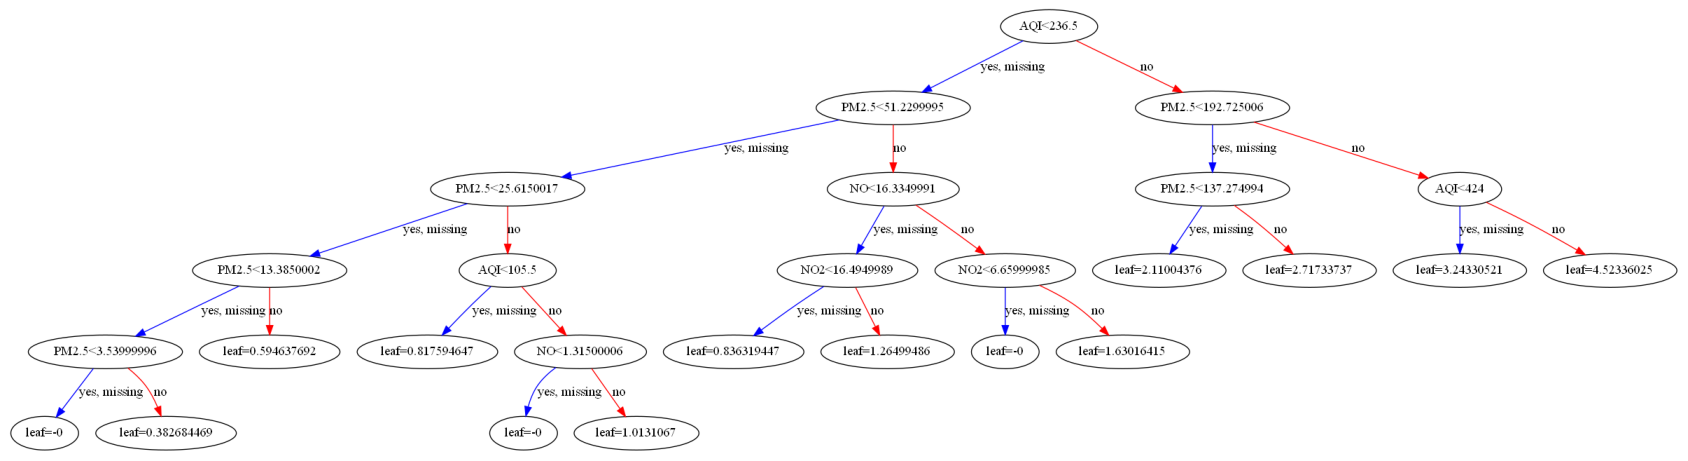

In [44]:
# #Print desicion tree -> transparency into exactly what the model is doing
ig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(XGB_SLEEP_MODEL, num_trees=10, ax=ax)
plt.show()

In [12]:
XGB_SLEEP_MODEL.get_score(importance_type='gain')

{'PM2.5': 424.82427978515625,
 'PM10': 1781.9036865234375,
 'NO': 27.077701568603516,
 'NO2': 39.45930099487305,
 'Nox': 203.2990264892578,
 'NH3': 125.46080017089844,
 'CO': 757.4264526367188,
 'SO2': 1.407067894935608,
 'O3': 3.7577250003814697,
 'Benzene': 4.281380653381348,
 'Toluene': 3.7371554374694824,
 'Xylene': 1.7369096279144287,
 'AQI': 3426.68505859375}